----------------------------------------------------------------EDA ON  FRAUD DETECTION---------------------------------------------------------------------


STEPS :
1. Understand the data.
2. Clean the data.
3. Analysis for finding the relation between variables.


---------------------------------------------------------------------UNDERSTANDING THE DATA-------------------------------------------------------------

In [1]:
import numpy as np   # We import NumPy for fast numerical operations and efficient array handling in Python.
import pandas as pd  # We import Pandas to easily manage and analyze data, especially for handling tabular data like spreadsheets and CSV files. It provides powerful tools for data cleaning, manipulation, and exploration.
import matplotlib.pyplot as plt # We import Matplotlib to create visualizations like plots, graphs, and charts in Python, helping to better understand and present data.
import seaborn as sns# We import Seaborn to create more attractive and informative statistical visualizations, built on top of Matplotlib, with simplified syntax and additional features.
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/batti/Jupyter notebooks/CSV.Jupyter notebook/creditcard_2023.csv")  #We had taken FRAUD DETECTION dataset and we set a path.
data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In the above dataset we have seen so many negative values this may appear for several reasons depending on the contex and the nature of the data.


Here V1,V2......................v28 represent for the features or variables in dataset.


Class column contains 0's and 1's only-------here  0 represent "No Fraud" and 1 represent "Fraud".


Here "Amount" column typically represents the monitor values of the transation.


In [3]:
data.head()  #Here we use head to display first five columns in dataset.

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
data.tail()  #Here we use tail to display to last five colunms in dataset.

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [5]:
data.info #We use info() to get a quick summary of the datasets structure and missing values.

<bound method DataFrame.info of             id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8     

In [6]:
data.describe #We use describe() to get summary statistics of numerical columns,
#such as mean, median, and standard deviation, to understand data distributions and variability.
#Means:The mean is the average of a set of numbers.
#median:The median is the middle value in a sorted set of numbers.
#Standard deviation: Standard deviation measures the amount of variation or spread in a set of numbers.

<bound method NDFrame.describe of             id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8   

In [7]:
data.columns   # We use columns to organize data into specific categories or features, making it easier to analyze and understand.

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

DATA ANALYSIS:


1.Missing Values.

2.Explore about the numerical variables.

3.Explore about categorical variables.

4.Finding Relationship between features.




In [8]:
data.shape   #Shape gives the dimensions of a dataset, showing the number of rows and columns.

(568630, 31)

--------------------------------------------------------------CLEANING THE DATA-----------------------------------------------------------------------

In [9]:
data.isnull().sum()  #We use isnull() to identify missing values in a dataset.

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
[features for features in data.columns if data [features].isnull().sum()>1] #
#We use features (columns) to represent the variables or attributes in a dataset that are analyzed to make predictions or gain insights.

[]

<Axes: >

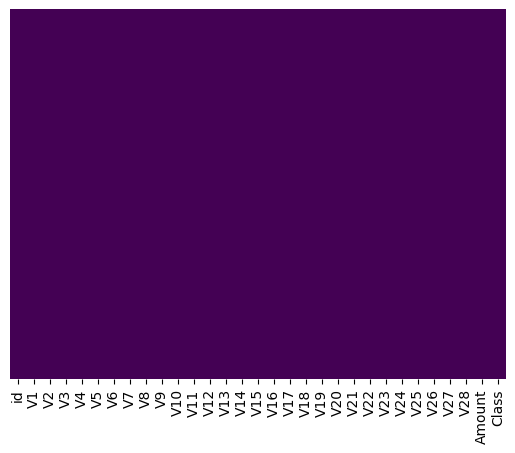

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
# A heatmap is a visualization tool that uses color to represent the values of a dataset, making it easy to see patterns, correlations, and outliers.
# mainly it is used to find out the outliers

#The below graph shows that there is no outliers for the dataset.

In [12]:
data.dtypes  
#dtypes refers to the data type of each column in a dataset, such as integer, float, or object, and it helps ensure proper data handling and analysis.


id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [13]:
data.Amount.value_counts()      
# value_counts() is a function which is used to count the occurrences of each unique value in a column, helping to understand the distribution of categorical data.
# Here we use values_count() for amount column.

Amount
22239.17    5
11374.95    5
22481.52    5
14264.39    5
14773.74    5
           ..
11128.21    1
20276.18    1
6245.40     1
22653.50    1
21493.92    1
Name: count, Length: 506485, dtype: int64

In [14]:
Amount_name=data.Amount.value_counts().index   #I assign the Amount.value counts() to Amount_name to get a quick overview of the distribution of values in an Amount column of a dataset.
Amount_name # Here we used index to get overview of dtype in float values and name of the column and length of the column.

Index([22239.17, 11374.95, 22481.52, 14264.39, 14773.74, 23840.23,  11505.1,
         282.35, 19073.22, 15842.27,
       ...
        1769.73, 19428.01,  7133.27, 14910.22, 11365.76, 11128.21, 20276.18,
         6245.4,  22653.5, 21493.92],
      dtype='float64', name='Amount', length=506485)

In [15]:
Amount_values=data.Amount.value_counts().values #Here i use values to get an overview about array and dtype in integer values.
Amount_values


array([5, 5, 5, ..., 1, 1, 1], dtype=int64)

In [16]:
V1_Values=data.V1.value_counts().values #
V1_Values

array([3539, 1399,  259, ...,    1,    1,    1], dtype=int64)

In [17]:
V1_count=data.V1.value_counts().index
V1_count

Index([-1.7045165212124185,  -2.459141149335575, -1.1613356376145123,
        -1.065575815836581,  -1.522526483227019,  1.0430621137097136,
       -1.0239578433718468, -1.5043433774345454, -1.6780711787361384,
        -0.396577624435608,
       ...
       -0.2490382087470722, -0.0545085435880163, -0.3830436208688713,
       -0.0759138927231048,   1.639604299162676, -0.2728520662257603,
        1.8221233146628584,  0.5569307318395185,  0.2768023796023117,
       -0.7951441654135905],
      dtype='float64', name='V1', length=552035)

-------------------------------------------------------------------- VIUALIZATIONTHE DATA-------------------------------------------------------------

In [18]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import figure
style.use('fivethirtyeight')
import seaborn

-------------------------------------------------------------------------BAR CHART-------------------------------------------------------------------------

Text(0.5, 1.0, 'Class balance')

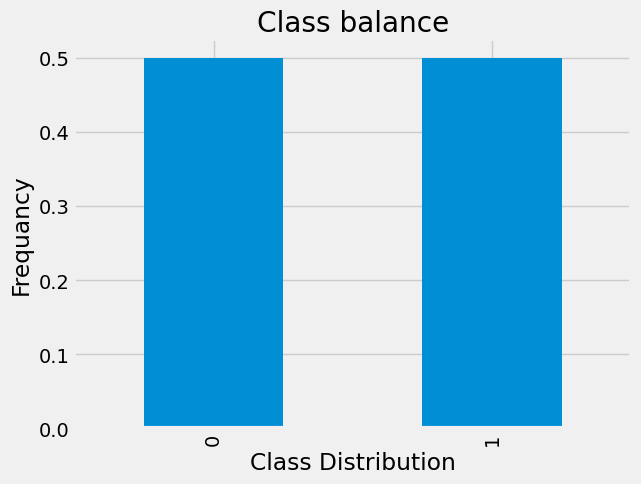

In [19]:
data['Class'].value_counts(normalize= True).plot(kind= 'bar') 
plt.xlabel("Class Distribution")
plt.ylabel("Frequancy")
plt.title("Class balance") #---------------------------?

In [20]:
Class =data[data=='Class']  # Here  i had taken Class column  to get only Class data.
Class

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In Exploratory Data Analysis (EDA), the target variable is crucial because it helps you understand the outcome you're trying to predict, guides feature selection, reveals patterns or relationships in the data, and highlights potential issues like class imbalance or outliers, all of which are essential for building effective models.

In [21]:
target=data['Class'] #Here class is a target variable,from this target variable we will draw pie chart and bar chart from the dataset.
target

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

-------------------------------------------------------------------------------PIE CHART-------------------------------------------------------------------------------------------

A pie chart in EDA is used to visually represent the proportions of categorical data, making it easy to compare the relative sizes of different categories at a glance.

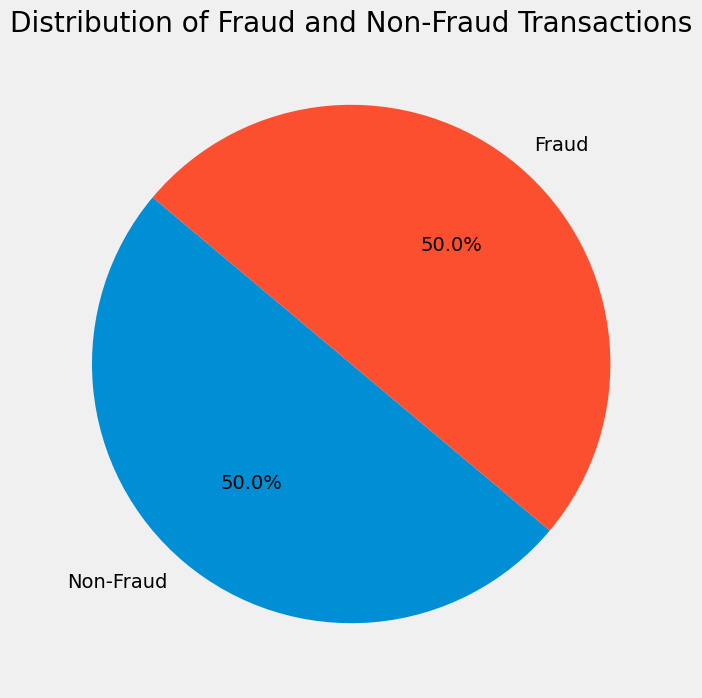

In [22]:

# Select the target variable
target = data['Class']

# Count the occurrences of each class
class_counts = target.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8,8))
class_counts.plot.pie(autopct='%1.1f%%', startangle=140, labels=['Non-Fraud', 'Fraud'])
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.ylabel('')  # Optional to remove the y-label
plt.show()



--------------------------------------------------------------------------------BAR CHART----------------------------------------------------------------------

A bar chart in EDA quickly shows and compares the frequency or size of different categories, making it easy to spot trends and differences.

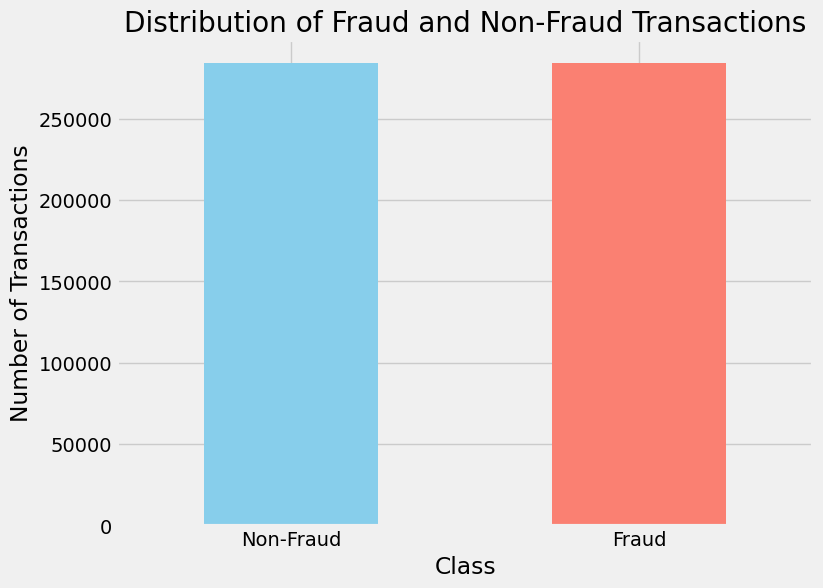

In [23]:
# Select the target variable
target = data['Class']

# Count the occurrences of each class
class_counts = target.value_counts()

# Plotting the bar chart
plt.figure(figsize=(8,6))
class_counts.plot.bar(color=['skyblue', 'salmon'])
plt.title('Distribution of Fraud and Non-Fraud Transactions')
#plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.show()



From this bar and pie chart we can say that the 0 and 1 values are equal in this dataset that means fraud and non-fraud are equall.

-------------------------------------------------------------------------------BOXPLOT----------------------------------------------------------------

Boxplots in EDA are used to quickly visualize the distribution, identify outliers, and compare different groups, helping to understand the data's central tendency and spread.

<Axes: >

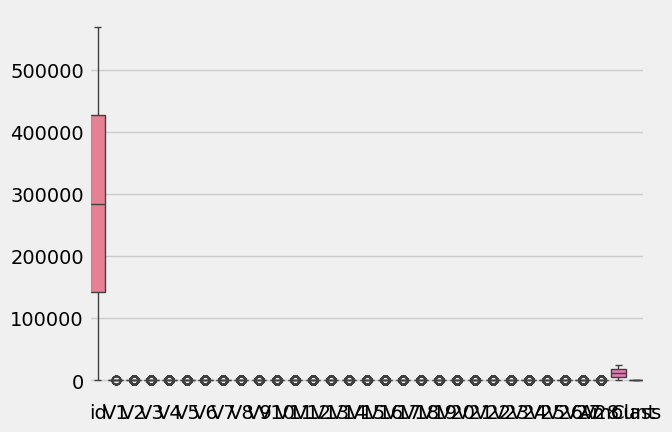

In [24]:
sns.boxplot(data)

The boxplot shows that most data points range from about 100,000 to 400,000, with a median around 300,000. There are some high outliers, but the x-axis labels are unclear.

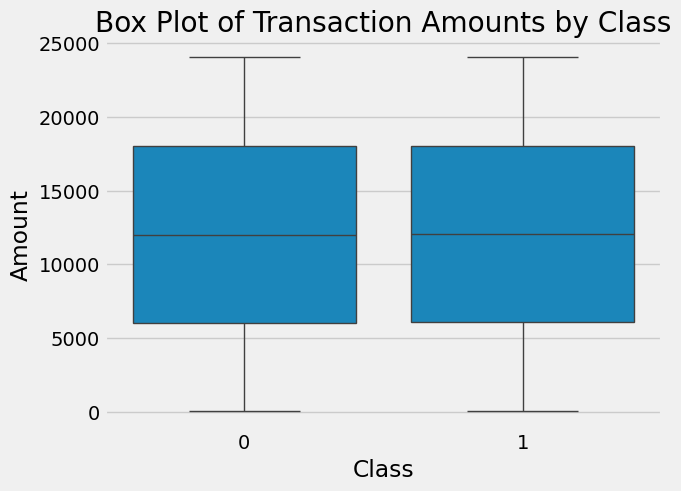

In [25]:
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Box Plot of Transaction Amounts by Class')
plt.show()
   

This boxplot compares transaction amounts between two classes (0 and 1). Both classes have similar distributions, with medians around 10,000 and most values falling between 5,000 and 20,000. There are no significant differences between the two classes in terms of transaction amounts.

-----------------------------------------------------------------------COUNT PLOT------------------------------------------------------------------

A count plot shows the frequency of each category in a categorical variable, helping to visualize distributions and identify imbalances.

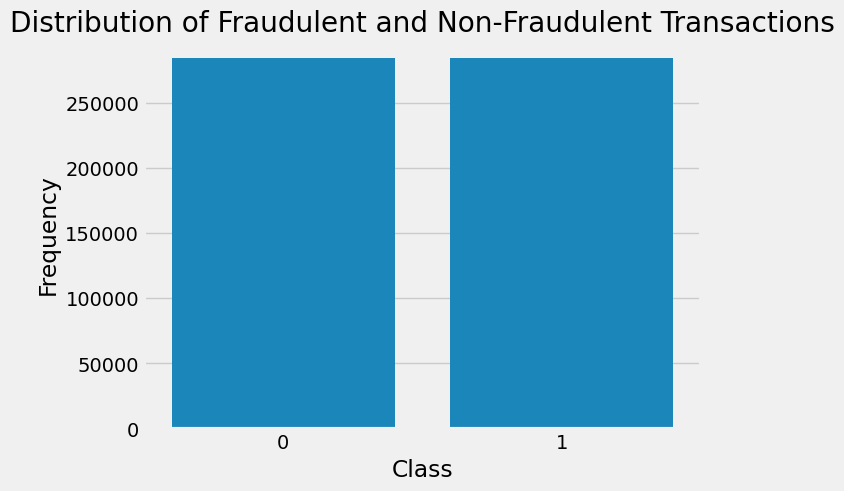

In [26]:
sns.countplot(x='Class', data=data)

# Set the labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()



This countplot shows that non-fraudulent transactions (class 0) are far more frequent than fraudulent ones (class 1), indicating a significant class imbalance in the data.

-------------------------------------------------------------------SCATTER PLOT----------------------------------------------------------------------

Scatter plots in EDA help visualize relationships between two variables, detect outliers, and reveal patterns or trends in the data.

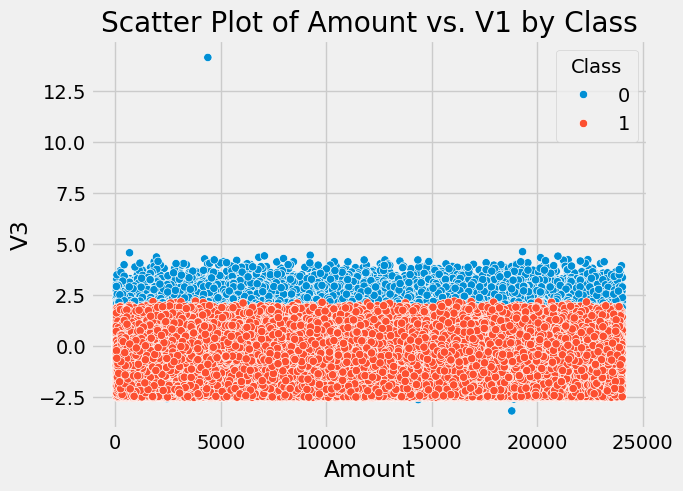

In [27]:
sns.scatterplot(x='Amount', y='V3', hue='Class', data=data)
plt.title('Scatter Plot of Amount vs. V1 by Class')
plt.show()

The scatter plot shows the relationship between "Amount" and "V3," distinguishing two classes: 0 and 1 (likely non-fraudulent and fraudulent).

C:\Users\batti\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


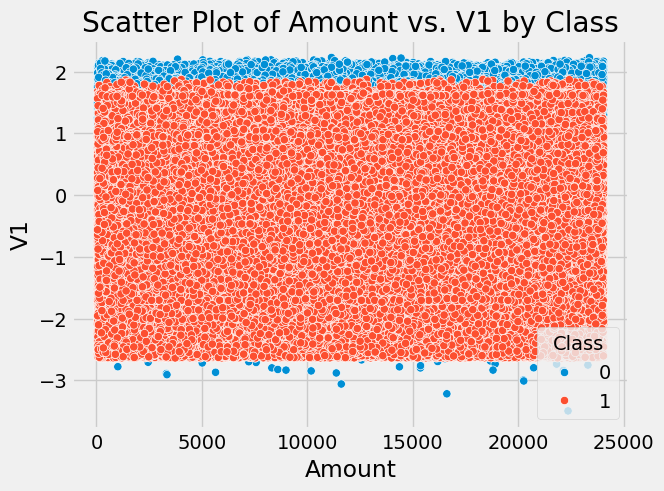

In [28]:
sns.scatterplot(x='Amount', y='V1', hue='Class', data=data)
plt.title('Scatter Plot of Amount vs. V1 by Class')
plt.show()

The scatter plot shows the relationship between "Amount" and "V1," distinguishing two classes: 0 and 1 (likely non-fraudulent and fraudulent).

-----------------------------------------------------------------VIOLIN PLOT---------------------------------------------------------------

A violin plot is used to show the distribution of data across categories. It visualizes the density and spread of the data, making it easy to compare different groups.

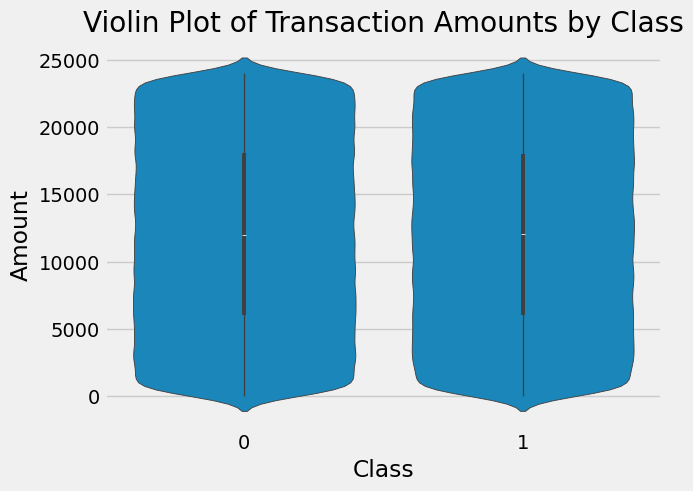

In [29]:
sns.violinplot(x='Class', y='Amount', data=data)
plt.title('Violin Plot of Transaction Amounts by Class')
plt.show()

The violin plot shows that both classes have similar distributions of transaction amounts, with most transactions clustered at lower values.

---------------------------------------------------------------------------------PAIR PLOT----------------------------------------------------------------

A pair plot in EDA helps visualize relationships and correlations between features, identify patterns and outliers, and understand feature distributions—all in one handy plot.

In [ ]:
sns.pairplot(data, hue='Class', vars=['Amount', 'V1',])
plt.show()

In [ ]:
sns.pairplot(data, hue='Class', vars=['Amount', 'V2',])
plt.show()

The dataset is for binary classification, likely detecting fraud. It has 28 numerical features, some with negative values due to preprocessing. The scatter plot shows a clear distinction between fraudulent and non-fraudulent transactions, indicating that the features effectively separate the two classes.

----------------------------------------------------------------------------CORRELATION HEATMAP---------------------------------------------------------

A correlation heatmap specifically visualizes the correlation coefficients between variables in a dataset. The color intensity represents the strength of the correlation, with different colors indicating positive or negative relationships. It's a quick way to spot highly correlated features, which can guide feature selection and help identify potential issues like multicollinearity.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(22, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix of Features')

# Show the plot
plt.show()

In [ ]:
# Correlation with the target variable
target_corr = correlation_matrix['Class'].sort_values(ascending=False)

# Display the correlations with the target variable
print(target_corr)